In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Columnas disponibles: Index(['mes', 'r:_(todo_el_mundo)', 'pandas:_(todo_el_mundo)',
       'matlab:_(todo_el_mundo)', 'tensorflow:_(todo_el_mundo)'],
      dtype='object')


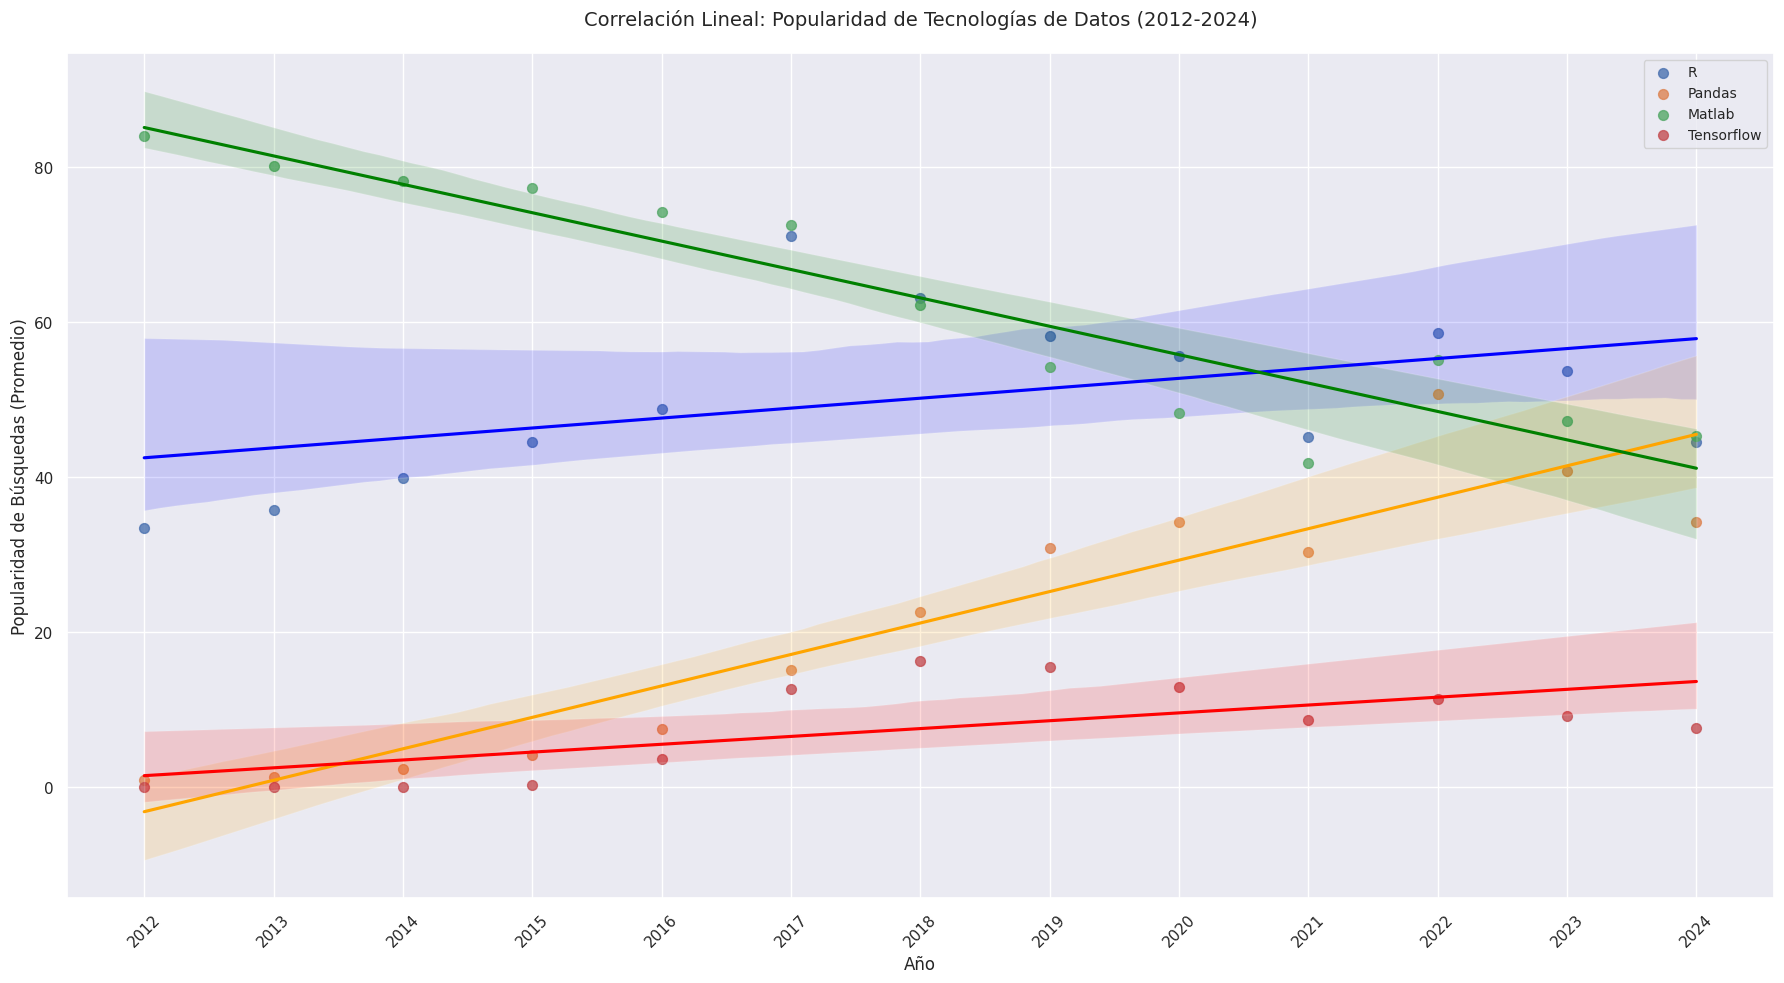


Matriz de correlación entre las tecnologías:
                             r:_(todo_el_mundo)  pandas:_(todo_el_mundo)  \
r:_(todo_el_mundo)                     1.000000                 0.520538   
pandas:_(todo_el_mundo)                0.520538                 1.000000   
matlab:_(todo_el_mundo)               -0.361776                -0.893103   
tensorflow:_(todo_el_mundo)            0.865357                 0.727550   

                             matlab:_(todo_el_mundo)  \
r:_(todo_el_mundo)                         -0.361776   
pandas:_(todo_el_mundo)                    -0.893103   
matlab:_(todo_el_mundo)                     1.000000   
tensorflow:_(todo_el_mundo)                -0.662999   

                             tensorflow:_(todo_el_mundo)  
r:_(todo_el_mundo)                              0.865357  
pandas:_(todo_el_mundo)                         0.727550  
matlab:_(todo_el_mundo)                        -0.662999  
tensorflow:_(todo_el_mundo)                     1.000000

In [25]:

# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/graficos/multiTimeline (4).xlsx')

# Normalizar los nombres de las columnas
data_excel.columns = data_excel.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar los nombres de las columnas
print("Columnas disponibles:", data_excel.columns)

# Especificar las columnas relevantes según los datos disponibles
cols_to_convert = ['r:_(todo_el_mundo)', 'pandas:_(todo_el_mundo)', 'matlab:_(todo_el_mundo)', 'tensorflow:_(todo_el_mundo)']

# Convertir las columnas de popularidad a tipo numérico
data_excel[cols_to_convert] = data_excel[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Convertir la columna 'mes' a tipo datetime
data_excel['mes'] = pd.to_datetime(data_excel['mes'])

# Extraer el año y agregarlo como una nueva columna
data_excel['año'] = data_excel['mes'].dt.year

# Agrupar los datos por año y calcular el promedio anual
data_excel_grouped = data_excel.groupby('año').mean().reset_index()

# Crear el gráfico de correlación lineal
plt.figure(figsize=(18, 10))

# Dibujar gráficos para cada tecnología
tecnologias = {
    'r:_(todo_el_mundo)': 'blue',
    'pandas:_(todo_el_mundo)': 'orange',
    'matlab:_(todo_el_mundo)': 'green',
    'tensorflow:_(todo_el_mundo)': 'red',
}

for tecnologia, color in tecnologias.items():
    sns.regplot(
        x=data_excel_grouped['año'],
        y=data_excel_grouped[tecnologia],
        label=tecnologia.split(':')[0].replace('_', ' ').capitalize(),  # Formato del nombre
        scatter_kws={'s': 50},  # Tamaño de los puntos
        line_kws={'color': color},  # Color de la línea
    )

# Configurar el gráfico
plt.title('Correlación Lineal: Popularidad de Tecnologías de Datos (2012-2024)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(data_excel_grouped['año'], rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular y mostrar correlaciones entre tecnologías
correlation_matrix = data_excel_grouped[cols_to_convert].corr()
print("\nMatriz de correlación entre las tecnologías:")
print(correlation_matrix)
